In [1]:
from fastai.vision import *
from fastai import *
import numpy as np

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
%%capture
!gdown --id "1gkh0-i0iBcjKyklrBWqCsyHVfwF65B16"
!gdown --id "1Apcsj9V-XbxrpvKDC_w9CkYxS9334iXd"
!unzip "Test.zip"
!unzip "Training.zip"
!rm "Training.zip"
!rm "Test.zip"
!rm -rf "__MACOSX"
!rm -rf "sample_data"

In [4]:
path = Path('/content')
print(path.ls())
np.random.seed(42)
dataValidation = ImageDataBunch.from_folder(path, train="Training",valid_pct=0.1,ds_tfms=get_transforms(), size=224, num_workers=2).normalize(imagenet_stats)
dataTraining = ImageDataBunch.from_folder(path, train="Training",valid="Training",ds_tfms=get_transforms(), size=224, num_workers=2).normalize(imagenet_stats)
dataTest = ImageDataBunch.from_folder(path, train="Training",valid="Test",ds_tfms=get_transforms(), size=224, num_workers=2).normalize(imagenet_stats)


[PosixPath('/content/.config'), PosixPath('/content/Training'), PosixPath('/content/Test')]


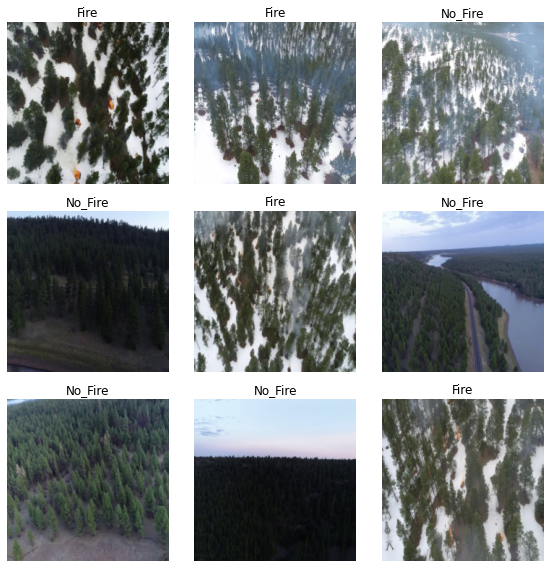

In [5]:
dataValidation.show_batch(rows=3, figsize=(8,8))

In [6]:
dataValidation

ImageDataBunch;

Train: LabelList (43193 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Valid: LabelList (4799 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,No_Fire,Fire,Fire
Path: /content;

Test: None

Train model

In [7]:
learn = cnn_learner(dataValidation, models.resnet50, metrics=error_rate)
epochs=5
learn.fit_one_cycle(epochs)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.085251,0.032855,0.012919,06:34
1,0.048181,0.012079,0.005209,06:36
2,0.021446,0.010079,0.003751,06:37
3,0.022002,0.006172,0.002084,06:33
4,0.013691,0.005538,0.002292,06:34


In [8]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


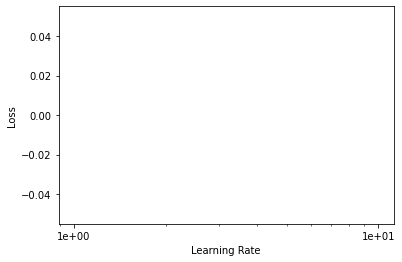

In [14]:
  learn.recorder.plot(skip_start=0, skip_end=2)

In [ ]:
learn.fit_one_cycle(epochs, max_lr=slice(1.3e-7,1.4e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.007607,0.003586,0.001016,04:49
1,0.010503,0.003843,0.001270,04:54
2,0.009358,0.003829,0.001016,04:51
3,0.005839,0.003823,0.001016,04:50
4,0.007424,0.003936,0.001270,04:50


In [ ]:
learn.save('stage-2')
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (35438 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Valid: LabelList (3937 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Test: LabelList (8617 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): C

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


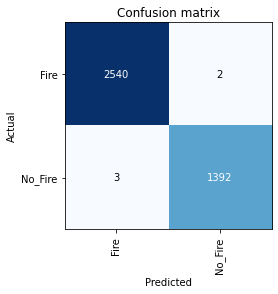

In [ ]:
#validation cm
cm=interp.plot_confusion_matrix()


In [ ]:
dataTraining

ImageDataBunch;

Train: LabelList (39375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Valid: LabelList (39375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Test: None

In [ ]:
learn = cnn_learner(dataTraining, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(epochs)
learn.save('stage-1')
learn.unfreeze()



epoch,train_loss,valid_loss,error_rate,time
0,0.047036,0.011473,0.003505,07:32
1,0.023698,0.007228,0.002413,07:34
2,0.016874,0.005989,0.001778,07:36
3,0.006646,0.002634,0.000838,07:34
4,0.005846,0.002756,0.000990,07:35


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.fit_one_cycle(epochs, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.023989,0.008179,0.002286,07:52
1,0.014154,0.005442,0.001117,07:53
2,0.011745,0.002108,0.000737,07:53
3,0.005804,0.001748,0.000432,07:52
4,0.006124,0.001058,0.000330,07:53


In [ ]:
learn.save('stage-2')

learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (39375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Valid: LabelList (39375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


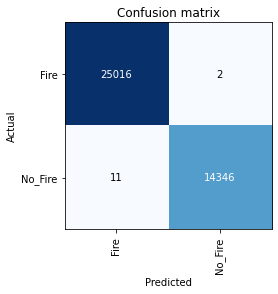

In [ ]:
#training
cm=interp.plot_confusion_matrix()


In [ ]:
dataTest

ImageDataBunch;

Train: LabelList (39375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Valid: LabelList (8617 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Fire,Fire,Fire,Fire,Fire
Path: /content;

Test: None

In [ ]:
learn = cnn_learner(dataTest, models.resnet50, metrics=error_rate) 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
epochs=10

In [ ]:
learn.fit_one_cycle(epochs)
learn.save('stage-1')
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.050668,1.821196,0.368574,06:49
1,0.031896,2.029924,0.363932,07:01
2,0.019646,1.461148,0.299292,07:00
3,0.013776,2.685565,0.387606,06:47
4,0.011651,1.046594,0.237786,07:02
5,0.007545,0.873752,0.256934,07:03
6,0.006087,1.001057,0.239759,06:43
7,0.007962,1.105764,0.267494,06:42
8,0.003812,0.814803,0.199954,06:47
9,0.005449,0.805763,0.211443,06:42


In [ ]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


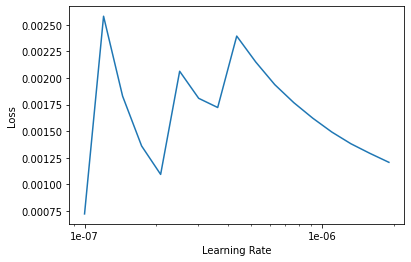

In [ ]:
learn.recorder.plot(skip_start=0, skip_end=5)

In [ ]:

learn.fit_one_cycle(epochs, max_lr=slice(1e-7,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.006542,0.797695,0.186608,06:55
1,0.004801,0.906768,0.233956,06:58
2,0.008093,0.920293,0.244169,06:54


KeyboardInterrupt: ignored

In [ ]:
learn.save('stage-2')

learn.load('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
#test
cm=interp.plot_confusion_matrix()
